### Importing Libraries 

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


### Loading Dataset 

In [2]:
# Load Dataset
df = pd.read_csv("question4-stock-data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head(10)

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
1980-03-17,0,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1980-03-18,1,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
1980-03-19,2,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
1980-03-20,3,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
1980-03-21,4,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
1980-03-24,5,2.371490,3.398259,3.451775,3.398259,0.000000,2803.0
1980-03-25,6,2.352816,3.371501,3.425017,3.371501,0.000000,27095.0
1980-03-26,7,2.352816,3.371501,3.425017,3.371501,0.000000,1869.0
1980-03-27,8,2.324807,3.331364,3.384880,3.331364,0.000000,14015.0


From the above few rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [4]:
df. shape

(11291, 7)

In [5]:
df.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,3259.575279,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,0.000000,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to 2024-12-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11291 non-null  int64  
 1   Adj Close   11198 non-null  float64
 2   Close       11174 non-null  float64
 3   High        11196 non-null  float64
 4   Low         11164 non-null  float64
 5   Open        11188 non-null  float64
 6   Volume      11146 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 705.7 KB


In [7]:
#checking the null values in the data
print("Null Value Present: ", df.isnull().values.any())
print(df.isnull().sum())

Null Value Present:  True
Unnamed: 0      0
Adj Close      93
Close         117
High           95
Low           127
Open          103
Volume        145
dtype: int64


In [8]:
df.fillna(method='ffill', inplace=True)  # Forward fill for prices
df['Volume'].interpolate(method='linear', inplace=True)  # Interpolate volume

# Verify no missing values remain
print("Null values after filling:", df.isnull().sum().sum())

Null values after filling: 0


### Exploratory Data Analysis (EDA) 

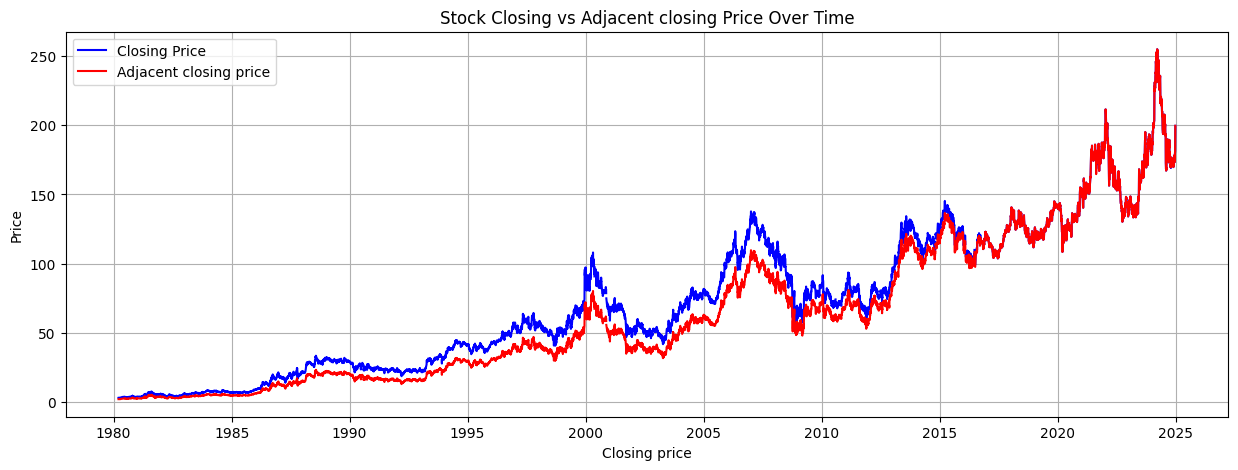

In [9]:
#plot to compare closing vs adjacent closing prices 
plt.figure(figsize=(15,5))

# Plot the closing prices
plt.plot(df['Close'], label="Closing Price", color='blue')

# Plot another data series, e.g., a 50-day moving average
plt.plot(df['Adj Close'], label="Adjacent closing price", color='red')

# Add title, labels, legend, and grid
plt.title("Stock Closing vs Adjacent closing Price Over Time")
plt.xlabel("Closing price")
plt.ylabel("Price")
plt.legend()
plt.grid()

# Show the plot
plt.show()


We can see that the data in the Close and that available in the Adj Close is the same.

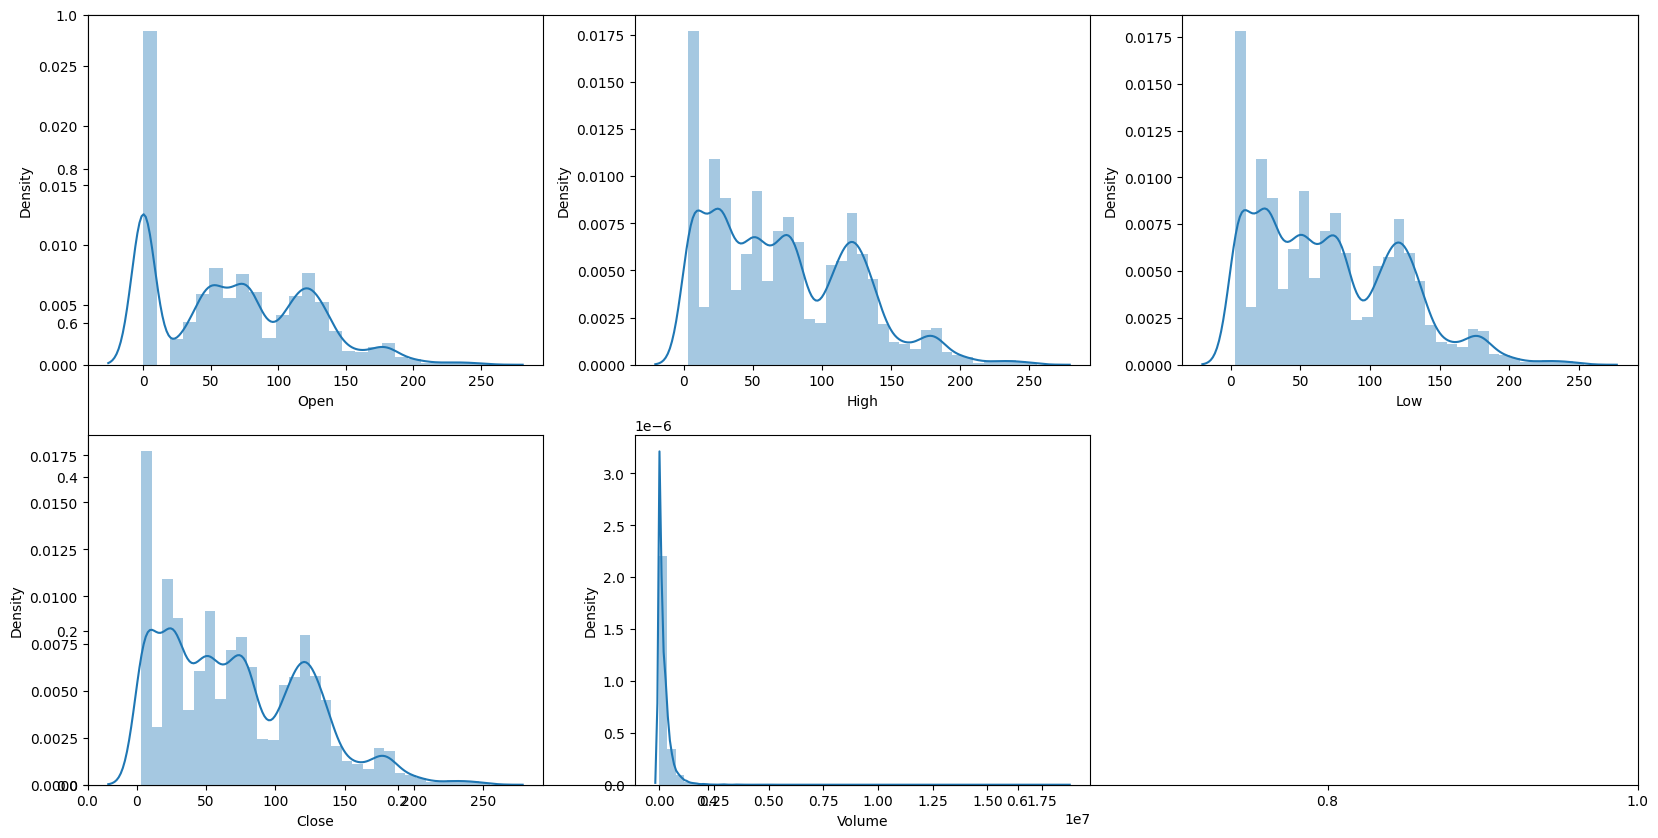

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

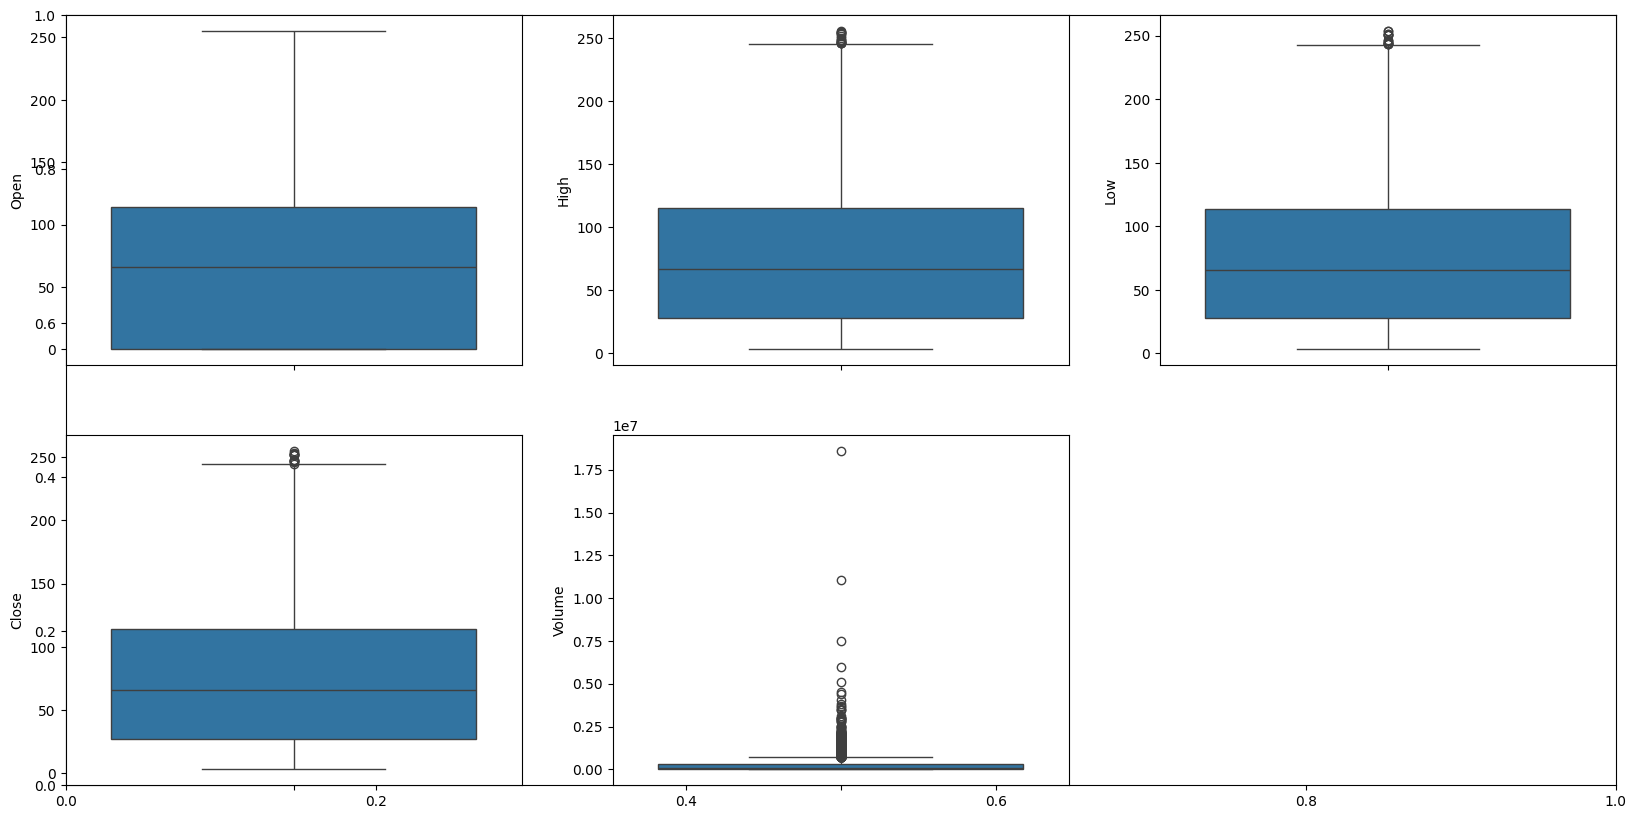

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

### Feature Engineering 

In [12]:
# the difference between 'Open' and 'Close' prices and create a new column 'open-close'
df['open-close'] = df['Open'] - df['Close']

# the difference between 'Low' and 'High' prices and create a new column 'low-high'
df['low-high'] = df['Low'] - df['High']

# the difference between 'High' and 'Low' prices and create a new column 'high-low'
df['high-low'] = df['High'] - df['Low']


In [ ]:
#This code splits the Date column in the DataFrame df into separate components (day, month, and year) using the str.split() method. It then assigns the individual components to new columns:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

In [14]:
# Adding 5-day and 10-day exponential moving averages
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()  # 5-day EMA
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day EMA


In [15]:
# the 5-day rolling mean of the 'open-close' column and create a new column 'open_close_rolling_mean'
df['open_close_rolling_mean'] = df['open-close'].rolling(window=5).mean()

# the 10-day rolling standard deviation (volatility) of the 'Close' prices and create a new column 'volatility'
df['volatility'] = df['Close'].rolling(window=10).std()  # 10-day rolling volatility

# a new column 'volatility_adjusted_high_low' by multiplying 'high-low' by the 'volatility'
df['volatility_adjusted_high_low'] = df['high-low'] * df['volatility']


In [16]:
#to predict the closing price 5 days in the future
df['target'] = df['Close'].shift(-5)

In [17]:
df.dropna(inplace=True) #drops the rows with null vlaues created after moving the target variable 5 days ahead

In [18]:
df.isnull().sum()

Unnamed: 0                      0
Adj Close                       0
Close                           0
High                            0
Low                             0
Open                            0
Volume                          0
open-close                      0
low-high                        0
high-low                        0
EMA_5                           0
EMA_10                          0
open_close_rolling_mean         0
volatility                      0
volatility_adjusted_high_low    0
target                          0
dtype: int64

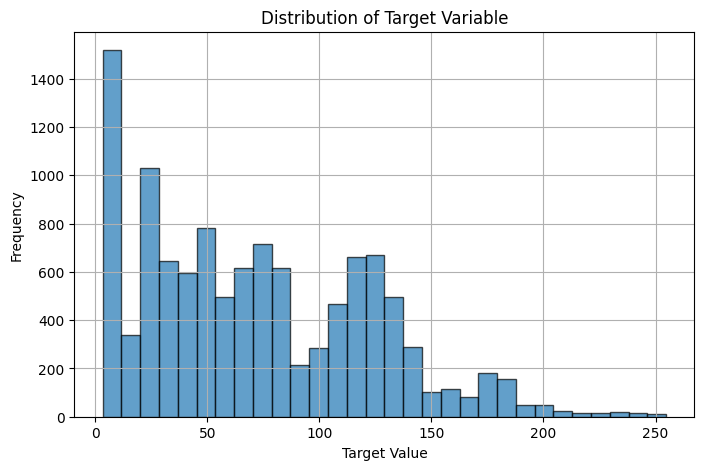

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df['target'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


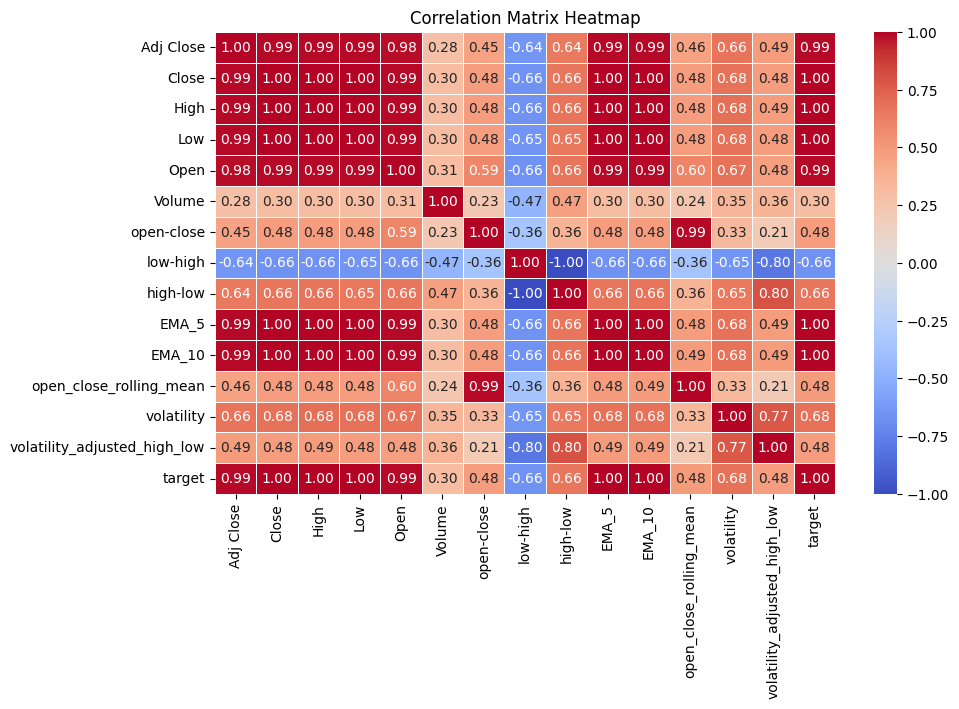

In [20]:
import seaborn as sns

# Drop any unnamed columns from the DataFrame
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

From the above heatmap, we can say that there is a high correlation between the added features, where the OHLC features are not highly correlated with each other.

### Data handling 

In [21]:
features = df[['open-close', 'low-high','high-low','Volume','Low','High','Open','EMA_5','EMA_10','open_close_rolling_mean','volatility','volatility_adjusted_high_low']]
target = df['target']

In [22]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [23]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(10149, 12) (1128, 12)


### Model Development and Comparison 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Replace the classifiers with regressors
models = [LinearRegression(), SVR(kernel='poly'), XGBRegressor()]

for model in models:
    model.fit(X_train, Y_train)
    print(f'{model} : ')
    print('Training R2 Score: ', model.score(X_train, Y_train))  # R^2 score for regression
    print('Validation R2 Score: ', model.score(X_valid, Y_valid))
    print()


LinearRegression() : 
Training R2 Score:  0.9965112658472597
Validation R2 Score:  0.9962712815312719

SVR(kernel='poly') : 
Training R2 Score:  0.7485105182191014
Validation R2 Score:  0.712476446708141

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training R2 Score:  0.9992580731948617
Valida

### XGBRegressor 

In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best score: -8.381797326193338


In [26]:
# Get the best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

### Model Evaluation 

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = best_model.predict(X_valid)  
rmse = np.sqrt(mean_squared_error(Y_valid, y_pred))
r2 = r2_score(Y_valid, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

RMSE: 2.9036091943251114
R^2 Score: 0.996829703484416


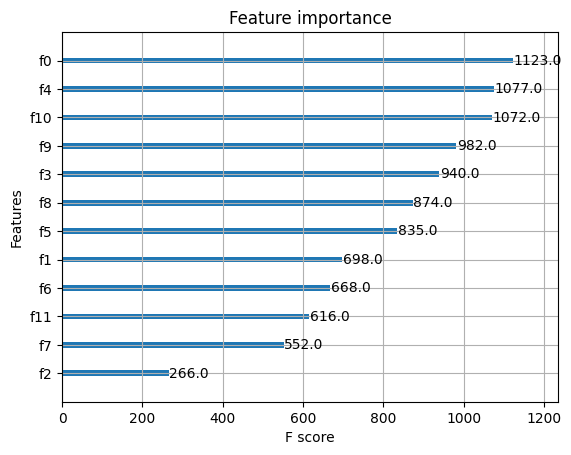

In [28]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model)
plt.show()


In [29]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Date': df.index[-len(y_pred):],  # Get the corresponding dates for the predictions
    'Predicted_Close': y_pred       # The predicted closing prices
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv


#### Directional Accuracy

In [30]:
n_predictions = len(y_pred)  # Length of predictions

# Slice the dataframe to match the number of predictions
df_predicted_subset = df.iloc[-n_predictions:]  # Subset the last n rows for prediction

# Now calculate actual and predicted directions based on the subset
df_predicted_subset["actual_direction"] = np.sign(df_predicted_subset["target"] - df_predicted_subset["Close"])  # Actual direction
df_predicted_subset["predicted_direction"] = np.sign(y_pred - df_predicted_subset["Close"])  # Predicted direction

# Compute Directional Accuracy
directional_accuracy = np.mean(df_predicted_subset["actual_direction"] == df_predicted_subset["predicted_direction"]) * 100

print(f"Directional Accuracy: {directional_accuracy:.2f}%")


Directional Accuracy: 50.00%


### LSTM Model  




Epoch 1/50

281/281 [==============================] - 33s 88ms/step - loss: 0.0016 - val_loss: 8.6108e-04
Epoch 2/50
281/281 [==============================] - 24s 84ms/step - loss: 1.7811e-04 - val_loss: 8.2991e-04
Epoch 3/50
281/281 [==============================] - 29s 104ms/step - loss: 1.6333e-04 - val_loss: 0.0014
Epoch 4/50
281/281 [==============================] - 29s 102ms/step - loss: 1.5185e-04 - val_loss: 8.3027e-04
Epoch 5/50
281/281 [==============================] - 25s 90ms/step - loss: 1.4777e-04 - val_loss: 6.0883e-04
Epoch 6/50
281/281 [==============================] - 27s 97ms/step - loss: 1.5025e-04 - val_loss: 7.1731e-04
Epoch 7/50
281/281 [==============================] - 26s 93ms/step - loss: 1.2918e-04 - val_loss: 5.8519e-04
Epoch 8/50
281/281 [==============================] - 28s 100ms/step - loss: 1.4017e-04 - val_loss: 6.6661e-04
Epoch 9/50
281/281 [==============================] - 28s 99ms/step - loss: 1.2810e-04 - val_loss: 5.8605e-04
Epoch 10/50

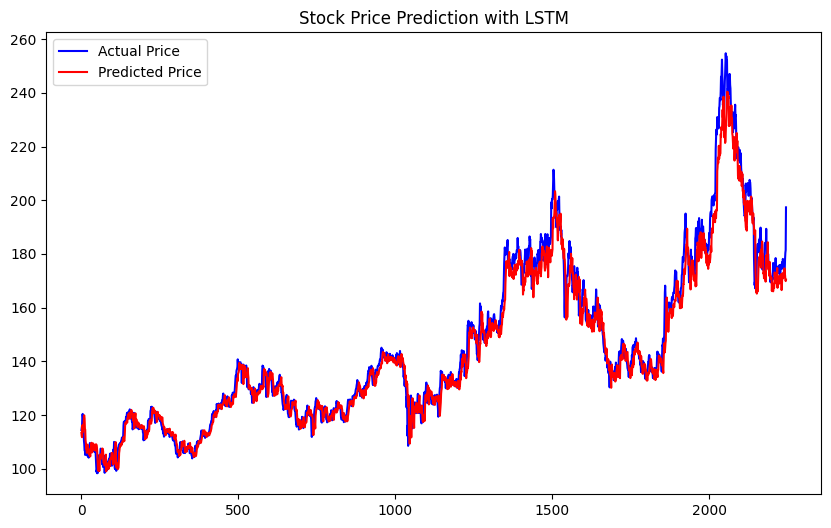

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("question4-stock-data.csv")  # Ensure it has 'Close' column
df.fillna(method='ffill', inplace=True)  # Fill missing values

# Select the target variable (stock price)
close_prices = df[['Close']].values

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for LSTM
def create_sequences(data, time_step=60, forecast_horizon=5):
    X, Y = [], []
    for i in range(len(data) - time_step - forecast_horizon):
        X.append(data[i:i+time_step])  # Last 60 days
        Y.append(data[i+time_step+forecast_horizon-1])  # Price 5 days ahead
    return np.array(X), np.array(Y)

# Define time step (e.g., last 60 days) and forecast horizon (5 days ahead)
time_step = 60
forecast_horizon = 5
X, Y = create_sequences(scaled_data, time_step, forecast_horizon)

# Split into train & test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)  # Predict stock price
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Predict
predictions = model.predict(X_test)

# Inverse transform predictions
predictions = scaler.inverse_transform(predictions)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(Y_test_actual, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red")
plt.legend()
plt.title("Stock Price Prediction with LSTM")
plt.show()
